In [1]:
# 02_garch_methods.ipynb

# === Setup ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from volsense_pkg.data_fetching.fetch_yf import fetch_ohlcv, compute_returns_vol
from volsense_pkg.models.garch_methods import ARCHForecaster
from volsense_pkg.forecasters.forecaster_api import VolSenseForecaster

# === Fetch SPY OHLCV data ===
df = fetch_ohlcv("SPY", start="2020-01-01")
df = compute_returns_vol(df, window=21, ticker="SPY")

# ensure schema for downstream forecasters
df["ticker"] = "SPY"
df = df.rename(columns={"vol_realized": "realized_vol"})
returns_series = df["return"].dropna()

print(df.head())

C:\Users\rahul\OneDrive\Documents\GitHub\VolSense\volsense_pkg\data_fetching\fetch_yf.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

         date    return  realized_vol ticker
21 2020-02-03  0.007429      0.120011    SPY
22 2020-02-04  0.015241      0.127837    SPY
23 2020-02-05  0.011548      0.132694    SPY
24 2020-02-06  0.003365      0.131963    SPY
25 2020-02-07 -0.005330      0.133393    SPY


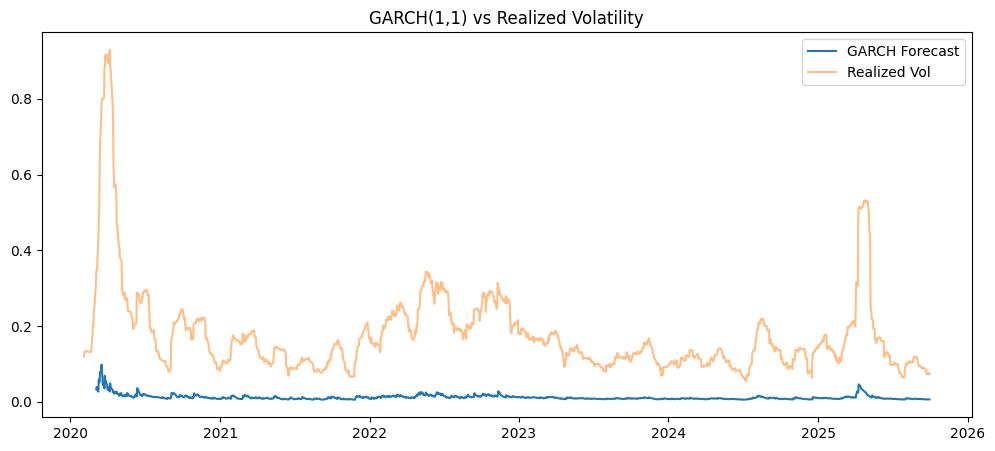

In [2]:
# --- Fit GARCH ---
garch_f = VolSenseForecaster(method="garch", p=1, q=1)
garch_f.fit(returns_series)

# --- Rolling prediction ---
garch_preds = garch_f.model.predict(horizon=1, rolling=True)

plt.figure(figsize=(12,5))
plt.plot(df["date"].iloc[-len(garch_preds):], garch_preds, label="GARCH Forecast")
plt.plot(df["date"], df["realized_vol"], alpha=0.5, label="Realized Vol")
plt.title("GARCH(1,1) vs Realized Volatility")
plt.legend()
plt.show()

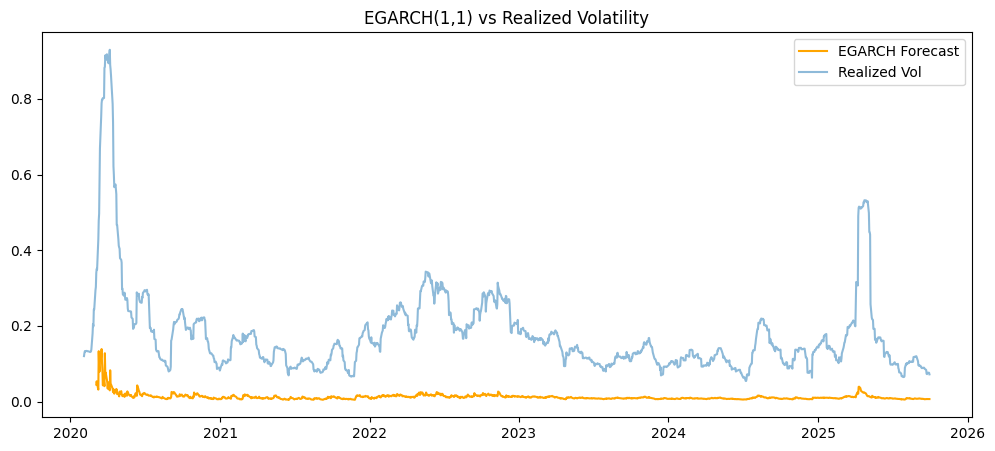

In [4]:
# --- Fit EGARCH ---
egarch_f = VolSenseForecaster(method="egarch", p=1, q=1)
egarch_f.fit(returns_series)

egarch_preds = egarch_f.model.predict(horizon=1, rolling=True)

plt.figure(figsize=(12,5))
plt.plot(df["date"].iloc[-len(egarch_preds):], egarch_preds, label="EGARCH Forecast", color="orange")
plt.plot(df["date"], df["realized_vol"], alpha=0.5, label="Realized Vol")
plt.title("EGARCH(1,1) vs Realized Volatility")
plt.legend()
plt.show()